# HW 3:

## Part 1:  
*Begin by plotting a Gaussian and Lorentzian profile.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz

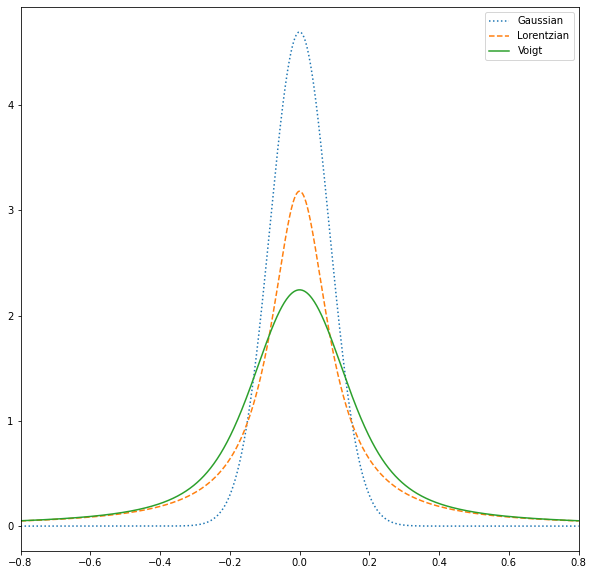

In [2]:
def G(x, alpha):
    """ Return Gaussian line shape at x with HWHM alpha """
    return np.sqrt(np.log(2) / np.pi) / alpha\
                             * np.exp(-(x / alpha)**2 * np.log(2))

def L(x, gamma):
    """ Return Lorentzian line shape at x with HWHM gamma """
    return gamma / np.pi / (x**2 + gamma**2)

def V(x, alpha, gamma):
    """
    Return the Voigt line shape at x with Lorentzian component HWHM gamma
    and Gaussian component HWHM alpha.

    """
    sigma = alpha / np.sqrt(2 * np.log(2))

    return np.real(wofz((x + 1j*gamma)/sigma/np.sqrt(2))) / sigma\
                                                           /np.sqrt(2*np.pi)
fig, ax = plt.subplots(1,1, figsize = (10, 10))

alpha, gamma = 0.1, 0.1
x = np.linspace(-0.8,0.8,1000)
ax.plot(x, G(x, alpha), ls=':', label='Gaussian')
ax.plot(x, L(x, gamma), ls='--', label='Lorentzian')
ax.plot(x, V(x, alpha, gamma), label='Voigt')
ax.set_xlim(-0.8,0.8)
ax.legend()

### Question 1:   

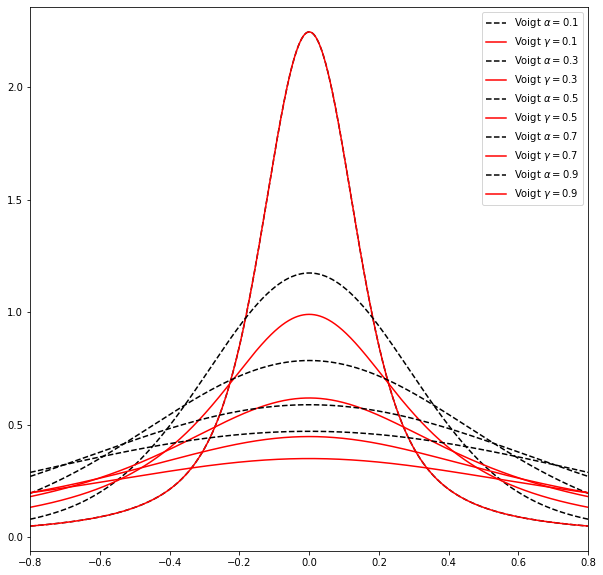

In [3]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))

alpha, gamma = np.arange(0.1, 1, 0.2), 0.1
x = np.linspace(-0.8,0.8,1000)

for a in alpha: 
    ax.plot(x, V(x, a, gamma), label=f'Voigt $\\alpha = {a:0.1}$', linestyle = 'dashed', color = 'k')
    ax.plot(x, V(x, gamma, a), label=f'Voigt $\\gamma = {a:0.1}$', linestyle = 'solid', color = 'r')
ax.set_xlim(-0.8,0.8)
ax.legend()

#### Question 1:

From the curves above, changing $\alpha$ in the Gaussian profile causes the resulting voigt profile to spread out and flatten out for larger values of $\alpha$. Increasing alpha changes the shape of the core more quickly than the shape of the wings. This can be seen by looking at the black dashed curves inteh plot above: The very bottom curve and the one above it have the relatively similar wing shapes and a greater magnitude difference in the core shapes. 

### Question 2:  

The curves above show the change in $\gamma$ of the lorentz profile also changes the height of the core and the wing shape. That said the change in the wing shape is greated when $\gamma$ is adjusted than when $\alpha$ is adjusted by the same amount. Looking at the curves above, the change in the wing shape between the $\gamma$ = 0.1 and $\gamma$ = 0.3 curves show a greater change in the wing shape than the same curves for when alpha is adjusted. 

### Question 3:  
The maximum and shape of the voigt profile is determined by the convolution of the component lorentz and gaussian distributions. Convolutions can be thought of as how the shape of one function changes the shape of the other. The shape and maximum of the voigt profile is given can be though of as the integral of the overlapping area as one profile is slip past the other. Therefore the maximum for a voigt profile where teh gaussian and voigt profile share a central value is located at the central value.

## Part 2:

Text(0.5, 1.0, 'Solor Spectrum near Na I D lines')

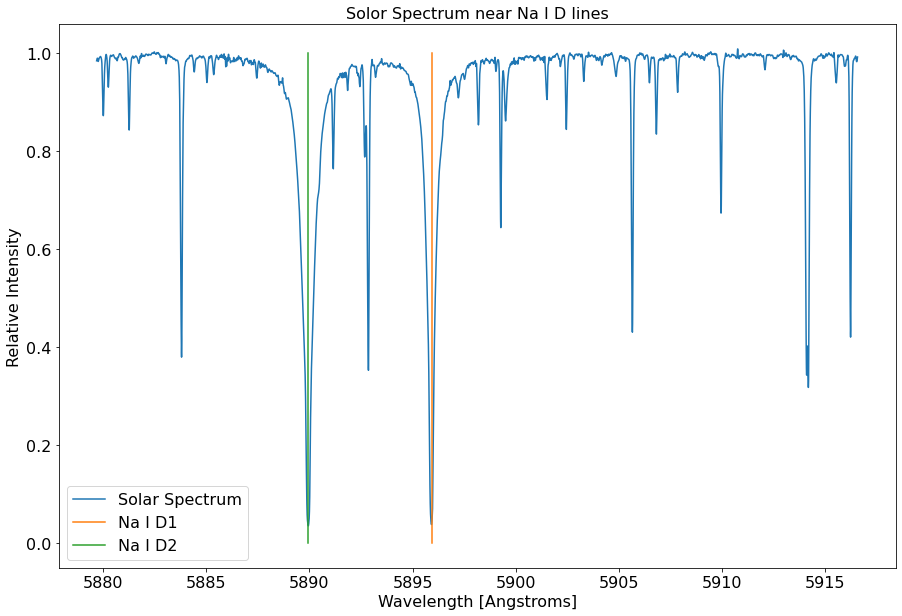

In [4]:
file = "nai_d_data.txt"
data = np.loadtxt(file)

# Convert vaccum wavelength to atmosphere wavelength
wavelength = data[:, 0] * 0.99972683 + 0.0107 - (196.25/ data[:, 0])
intensity = data[:, 1]

# Make data to plot location of the Na D 1 lines
na1d1 = np.repeat(5895.942, 2)
na1d2 = np.repeat(5889.950, 2)
y = [0, 1]

fig, ax = plt.subplots(1,1, figsize = (15, 10))
plt.tick_params(labelsize = 16)

# Plot Solar Spectrum
ax.plot(wavelength, intensity, label = "Solar Spectrum")

#Plot Na D 1 lines
ax.plot(na1d1, y, label = "Na I D1")
ax.plot(na1d2, y, label = "Na I D2")

ax.legend(fontsize = 16)
ax.set_xlabel('Wavelength [Angstroms]', fontsize = 16)
ax.set_ylabel('Relative Intensity', fontsize = 16)
ax.set_title('Solor Spectrum near Na I D lines', fontsize = 16)

#### Question 4: 

[]


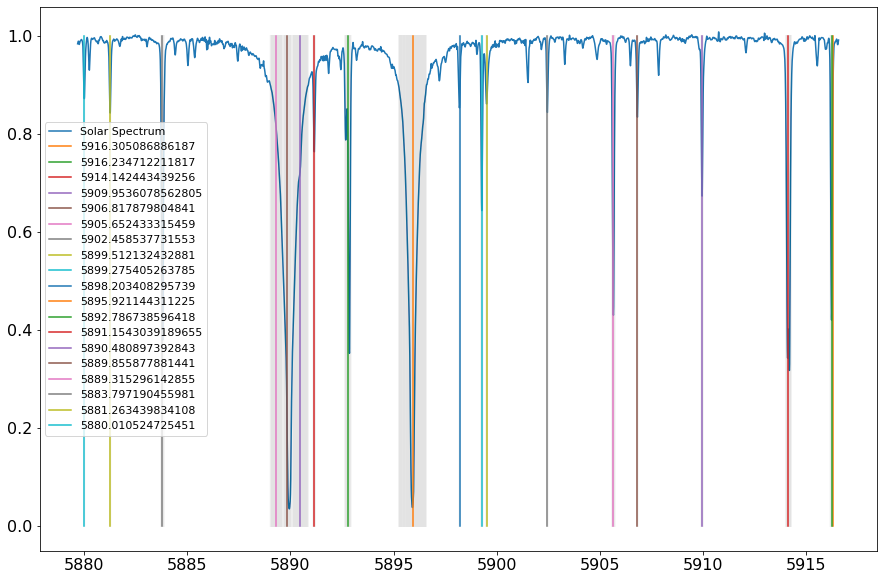

In [5]:
# Identify the wavelengths with intensity below some threshold
idx_true = data[:, 1] < 0.90

fig, ax = plt.subplots(1,1, figsize = (15, 10))
plt.tick_params(labelsize = 16)
ax.plot(wavelength, intensity, label = "Solar Spectrum")

#Plot all of those wavelengths
for i in wavelength[idx_true]:
    ax.plot(np.repeat(i, 2), [0, 1], alpha = 0.01, color = 'k')
    
ends = [0]
centers = []
print(centers)
for i in range(len(wavelength[idx_true])):
    if abs(wavelength[idx_true][i] - wavelength[idx_true][i - 1]) > 0.01:
    # Does math here that gives the index of the middle of the wavelength range
        idx = ends[-1] + (i - ends[-1])/2
        ends.append(i)
        centers.append(int(idx))
    # Get the middle of the very last line
    elif i == len(wavelength[idx_true]) - 1: 
        idx = ends[-1] + (i - ends[-1])/2
        ends.append(i)
        centers.append(int(idx))

y = [0, 1]
for wl in wavelength[idx_true][centers]:
    line = np.repeat(wl, 2)
    ax.plot(line, y, label = str(wl))
ax.legend(fontsize = 11)

The above program finds the line centers of the prominent lines from the solar spectrum. The number of lines it identifies depends on the intenstity that is used to filter the spectrum. A lower intensity threshold means that more lines are identified. Checking the wavelengths listed in the legend against the [ASD catalog](https://physics.nist.gov/cgi-bin/ASD/lines1.pl?spectra=&limits_type=0&low_w=5880&upp_w=5920&unit=0&submit=Retrieve+Data&de=0&format=0&line_out=0&en_unit=0&output=0&bibrefs=1&page_size=15&show_obs_wl=1&show_calc_wl=1&unc_out=1&order_out=0&max_low_enrg=&show_av=2&max_upp_enrg=&tsb_value=0&min_str=&A_out=0&intens_out=on&max_str=&allowed_out=1&forbid_out=1&min_accur=&min_intens=&conf_out=on&term_out=on&enrg_out=on&J_out=on) enables the identification of some of the lines: Fe I is responsible for lines at the following wavelengths: 5880.01, 5881.27, 5883.81, 5891.17, 5892.69, 5905.67, 5906.84, 5909.97, 5914.11, 5914.20. Ti has a strong line at 5899.29, and Thorium has a line just adjacent at 5899.51, and another at 5892.78 adjacent to the Fe I line at nearly the same location. The exact location of the line centers could be better determined if the line center was reselected when using a smaller subset of the data. 

0.037939 0.035164


Text(0.5, 1.0, 'Na I D2 line')

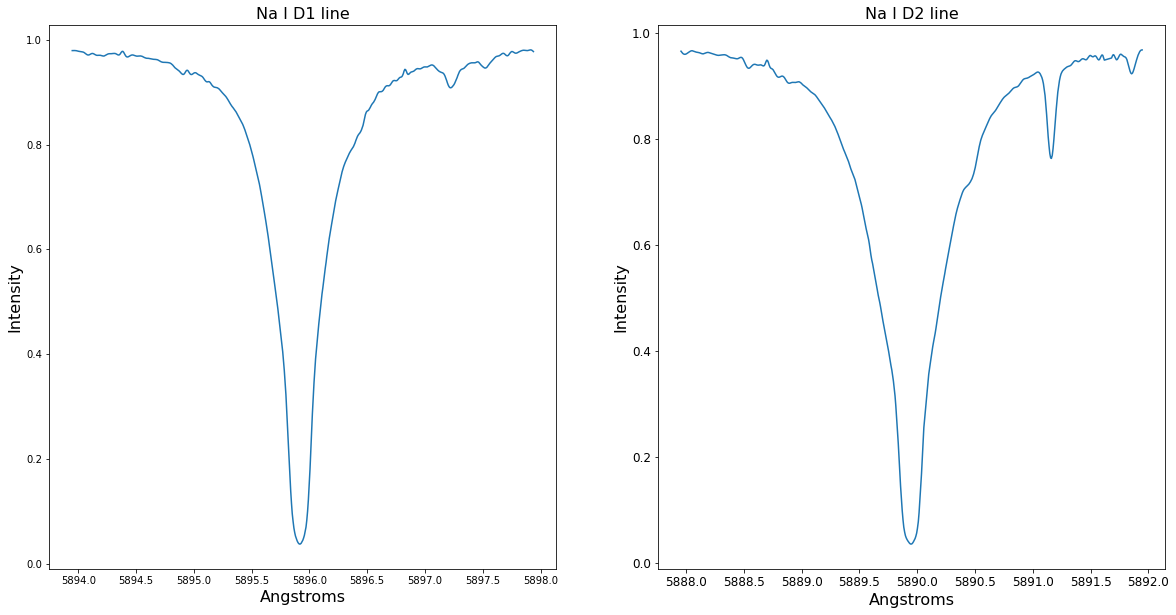

In [6]:
# Plot a subset of the spectrum around the Na I D lines
subset = [abs(wavelength - na1d1[0]) < 2, abs(wavelength - na1d2[0]) < 2]

fig, ax = plt.subplots(1, 2, figsize = (20, 10))
plt.tick_params(labelsize = 12)

ax[0].plot(wavelength[subset[0]], intensity[subset[0]])
print(min(intensity[subset[0]]), min(intensity[subset[1]]))
ax[0].set_title('Na I D1 line', fontsize = 16)
ax[0].set_xlabel('Angstroms', fontsize = 16)
ax[0].set_ylabel('Intensity', fontsize = 16)
ax[1].plot(wavelength[subset[1]], intensity[subset[1]])
ax[1].set_xlabel('Angstroms', fontsize = 16)
ax[1].set_ylabel('Intensity', fontsize = 16)
ax[1].set_title('Na I D2 line', fontsize = 16)
    

#### Question 5: 

The D2 line looks somewhat broader than the D1 line. Both lines look like they are asymmetric with a longer "wing" on the longer wavelength side. There is a more pronounced bulge on the D2 line on the longer wavelength side, this may be the result of another spectral line overlapping with the D2 line. Both lines have very nearly the same depth. 

### Part 3

In [7]:
import line_functions as lf
import scipy.optimize

C:\Users\Carter\anaconda3\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\Carter\anaconda3\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


The calculated blackbody temperature is 8.359590815376578


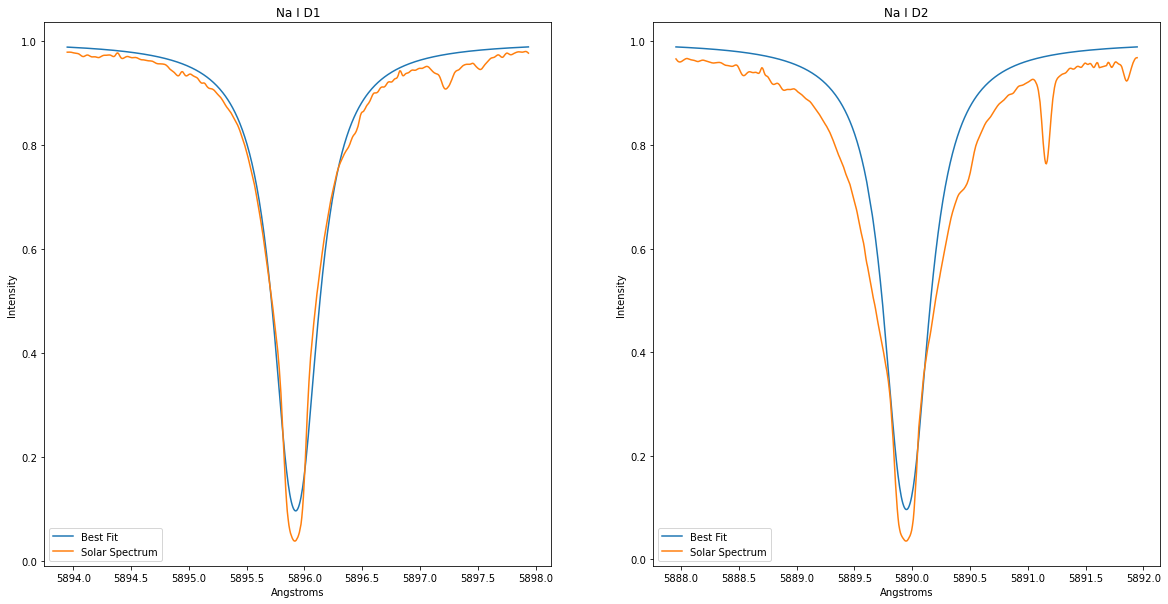

In [8]:
# Define the wavelengths to fit over: 


# The optical depth is given by the voigt profile,
# And both intial intensity and that ion the medium are given
# By the planck function

def norm_intensity(lam, line, alpha, gamma, T1):
    """
    Function to wrap the voigt profile and the blackbody profile
    up and return the normalized intenstity from the one layer model
    
    Parameters
    ----------
    lam: float
        wavelength (in cm) of light
    alpha & gamma: floats
        paramters of the voigt profile
    T1: float
        Temperature in Kelvin of the source blackbody
        
    Returns:
    --------
    float: 
        Normalized intensity
    """
    tsurface = 5770 # Surface temperature which remains constant
    tau = V(lam - line, alpha, gamma)
    io = lf.planck(lam * 1e-8, tsurface) # Convert Angstroms to centimeters
    bLam = lf.planck(lam * 1e-8, T1)
    return lf.one_layer_I(io, tau, bLam) / io

# Now use curve fit to give values for all the parameters: 
params = scipy.optimize.curve_fit(norm_intensity, # The function whose parameters it fits
                                  wavelength[subset[0]], # The wavelengths we want to fit over
                                  intensity[subset[0]], # The intensities we want a best fit for
                                 bounds = ([5890, 0, 0, 0], [6000, 1, 1, 10000])
                                 ) # Don't use symmetric bounds

# Plot the best fit for the Na I D1 line
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
names, lines = ['Na I D1', 'Na I D2'], [5895.924, 5889.950]

for a in range(2):
    ax[a].plot(wavelength[subset[a]], 
             norm_intensity(wavelength[subset[a]], lines[a], params[0][1], params[0][2], params[0][3]),
              label = "Best Fit")
    ax[a].plot(wavelength[subset[a]], intensity[subset[a]], label = "Solar Spectrum")
    ax[a].legend()
    ax[a].set_title(names[a], fontsize = 12)
    ax[a].set_xlabel('Angstroms', fontsize = 10)
    ax[a].set_ylabel('Intensity', fontsize = 10)
print(f'The calculated blackbody temperature is {params[0][3]}')

#### Question 6  
The fit mostly matches the overall shape of both of the sodium lines. However the best fit does not qualitatively match the depth of the solar spectrum for either line. The wings shape mostly matches the shape for the Na I D1 line, but does not match for the Na I D2 line. The wing shape of the model is above all of the values for the solar spectrum. Overall the model does a better job of fitting the wing shape than the core depth. 

#### Question 7  
The model fit the data better for the Na I D1 line than for the Na I D2 line. This is because the model parameters were determined using a least-squares fit for the data for the Na I D1 line. That said, neither fit is ideal since it does not capture the depth of either line and overestimates the intensity on the wings for both lines. 

#### Question 8  
The parameter that was adjusted the most was the temperature and the the least was gamma. The fact that temperature was adjusted the most suggests that the Na I D1 lines form very high above the surface of the sun. The best fit found a temperature of ~8 K. While this temperature seems somewhat unphysical for a stellar atmosphere, it is instructive in illustrating that the gas surrounding the surface of the sun is much cooler than the surface. The fact that the parameters of the voigt profile describing the optical depth are made to make the voigt profile very deep suggests that the conditions where the Na I D lines form create a very optically thick medium.

## Part 4

C:\Users\Carter\anaconda3\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\Carter\Documents\ASTR 421\line_functions.py:79: RuntimeWarning: overflow encountered in exp
  i1 = i0*np.exp(-tau_l) + Bl*(1 - np.exp(-tau_l))
C:\Users\Carter\Documents\ASTR 421\line_functions.py:79: RuntimeWarning: overflow encountered in multiply
  i1 = i0*np.exp(-tau_l) + Bl*(1 - np.exp(-tau_l))
C:\Users\Carter\Documents\ASTR 421\line_functions.py:79: RuntimeWarning: invalid value encountered in multiply
  i1 = i0*np.exp(-tau_l) + Bl*(1 - np.exp(-tau_l))
C:\Users\Carter\Documents\ASTR 421\line_functions.py:80: RuntimeWarning: overflow encountered in exp
  return i1*np.exp(-tau_s) + Bs*(1 - np.exp(-tau_s))
C:\Users\Carter\Documents\ASTR 421\line_functions.py:80: RuntimeWarning: invalid value encountered in multiply
  return i1*np.exp(-tau_s) + Bs*(1 - np.exp(-tau_s))
C:\Users\Carter\an

The calculated blackbody temperature is [0.1358543  8.35959082]


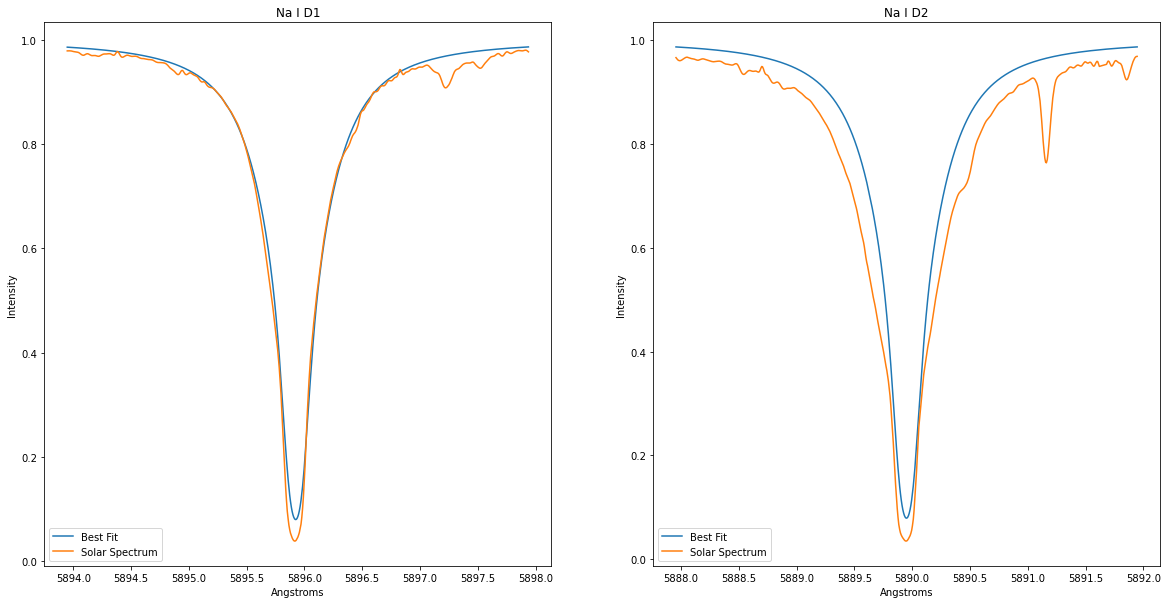

In [9]:
# Make another helper function
def two_layer(lam, line, alpha1, gamma1, alpha2, gamma2, T1, T2):
    """
    Function to wrap the voigt profile and the blackbody profile
    up and return the normalized intenstity from the one layer model
    
    Parameters
    ----------
    lam: float
        wavelength (in cm) of light
    alpha & gamma: floats
        paramters of the voigt profile
    T1: float
        Temperature in Kelvin of the source blackbody
        
    Returns:
    --------
    float: 
        Normalized intensity
    """
    # The temperature at the part of the atmosphere making all the light
    tsurface = 5770 
    
    # The emergent intensity from the part of the sun making all the light
    io = lf.planck(lam * 1e-8, tsurface) 
    
    # Calculate the voigt profile of the first atmoshpere scaling by 1/2 
    tau1 = V(lam - line, alpha1, gamma1)*0.5
    
    #  Calculat the same for the second atmosphere
    tau2 = V(lam - line, alpha2, gamma2)*0.5
    
    # Calculate the source function of both layers
    b1 = lf.planck(lam * 1e-8, T1)
    b2 = lf.planck(lam * 1e-8, T2)
    
    return lf.two_layer_I(io, tau1, b1, tau2, b2) / io
    
# Define bounds for the optimze to start with
bounds = ([5890, -10, -10, -10, -10, 0, 0],[6000, 10.1, 10.1, 10.1, 10.1, 10000, 10000])

[line, alpha1, gamma1,\
 alpha2, gamma2, T1, T2], _ \
= scipy.optimize.curve_fit(two_layer,
                           wavelength[subset[0]], # The wavelengths we want to fit over
                           intensity[subset[0]], # The intensities we want a best fit for
                           bounds = bounds,)

# Plot the best fit for the Na I D1 line
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
names, lines = ['Na I D1', 'Na I D2'], [5895.924, 5889.950]

for a in range(2):
    ax[a].plot(wavelength[subset[a]], 
               two_layer(wavelength[subset[a]], lines[a], alpha1, gamma1, alpha2, gamma2, T1, T2),
                label = "Best Fit")
    ax[a].plot(wavelength[subset[a]], intensity[subset[a]], label = "Solar Spectrum")
    ax[a].legend()
    ax[a].set_title(names[a], fontsize = 12)
    ax[a].set_xlabel('Angstroms', fontsize = 10)
    ax[a].set_ylabel('Intensity', fontsize = 10)
print(f'The calculated blackbody temperature is {params[0][-2:]}')

#### Question 9:  
Qualitatively the fit produced by the two atmosphere model looks very close to the stellar spectrum for the Na I D1 line. Teh wings of the fit match very closely the solar spectrum for the Na I D1 line. The core of the best fit is slightly above the core of the stellar spectra. That said, the same parameters fit to the Na I D2 line do not match as closely. Evidently the Na I D2 line more wide, and as a result the fit produced by the two model atmosphere overestimats the intensity at almost every wavelength. 

#### Question 10:  
The model fits the data better for the first line. This is becasue the data for the first line was used to find the best fit parameters and then the same parameters were used to fit the model to the line 2 data. Even though the amount of sodium is the same for the entire spectrum, there are other factors that cause the Na I D2 line to be wider which results in the model parameters that were found for the Na I D1 line to make an inaccurate model for the Na I D2 model. 

The model looks like it is an appropriate fit for the first line. However the temperature reported by the best fit for the two atmospheres is identical. This raises suspicion about the effectiveness of the model to account for the relationship between the optical depth wich is given by the voigt profile and temperature for each atmosphere. 

#### Question 12: 
The parameters returned by the model are those that factor into the transfer equation. They describe the optical depth and the temperature of the two atmospheres. From the fact that the temperature was dropped from the same temperature as the incident blackbody to around ~20 K, it can be inferred that the Na I D lines form in a part of the atmosphere much cooler than the surface.

#### Question 13:  
Evaluating qualitatively based on how well the fits look to fit the two lines, the second model made a more realistic representation of the Na I D lines. The second model lies closer to the solar spectrum at all points than the first model. It is especially more effective at capturing the shape of the wings and the depth of the core than the single layer atmosphere model.

#### Question 13: 
Models of stellar atmospheres become increasingly accurate as they incorporate more complex physics. This model could be improved by accounting for more atmospheric layers to account for the temperature gradient inside of stars. In addition a more accurate model would include the equations of hydrostatic equilibrium, thermodynamics, statistical and quantum mechanics, and the transport of energy by radiation and convection as well as an extensive library of opacities to calculate the temperature, pressure, and density at different depths within the star.

#### 14
The above exercise demonstrates the effctiveness of simple stellar models to broadly describe the characteristics of stars based on specififc spectral lines. For instance the model atmospheres above illustrate clearly that the absorption lines that correspond to the Na I D1 and D2 lines must take place very high up in the stellar atmosphere. While the temperatures given by the stellar models seems somewhat unphysical, the result is still instructive. Furthermore the exercise demonstrated the necessity for more complex stellar atmospheric models to more precisly describe observations of stars like the sun.

This exercise specifically has helped to clarify the role of the transfer equation and it's components in the formation of spectral lines. This exercise was especially useful for illustrating the fact that the surface of the sun that produces the light we observe is not infact the outermost layer of the sun and that significant features of the light observed are determined after the light has left the "surface" of the sun. 